### Push to Github master
`git push origin master`
待研究，小心使用

# Quantum ESPRESSO(QE) + Wannier90(W90) Tutorial
## Diamond cubic silicon

## Overview

This tutorial aims to teach the calculation of electronic properties using DFT+TB (Density Functional Theory combined with Tight-Binding) methods.\
Here are some key parameters:\
#### QE inputs: 
- `Si.upf` : Si pseudopotential for QE DFT calculations. Norm-conserving pseudopotentials (ONCVPSP) are preferred for BerkeleyGW and EPW. Download [here](https://github.com/pipidog/ONCVPSP).
- `scf.in` : Input for QE self-consistent DFT calculation.
- `band.in` : Input for QE bandstructure DFT calculation.

#### W90 inputs: 
- `Si.win` : Input for Wannier90 calculation.


#### Useful references:
1. [QE pw.x Input File Description](https://www.quantum-espresso.org/Doc/INPUT_PW.html)
2. [QE Tutorial](https://pranabdas.github.io/espresso/)
3. [QE 實踐詳解](https://yyyu200.github.io/DFTbook/blogs/2019/04/01/HandsOn/)
4. [Construct High Quality Wannier functions](https://www.wanniertools.org/tutorials/high-quality-wfs/)

### Login to cluster
#### IAMS HPC1

1. Download and open Termius [Download Termius](https://termius.com/download/macos)
2. `ssh username@hpc1.iams.sinica.edu.tw`
   

## QE DFT calculations 
1. Make `1-scf` directory. Make sure `scf.in`, `Si.upf`, and `job_scf.sh` are in the directory.
2. Do self-consistent(scf) calculations > `Si.save` (charge density).
3. Copy Si.save to `2-band` directory. Make sure `band.in`, `Si.save`, and `job_band.sh` are in the directory.
4. Do bandstructure calculation. 

#### scf.in

#### band.in

#### pp.in

### How to find high symmetry path?
#### Reference: W. Setyawan, S. Curtarolo / Computational Materials Science 49 (2010) 299–312
1. Check crystal symmetry > Si: Face-centered cubic.
2. Align the primitive lattice a1/a2/a3 with our QE inputs. > Make sure `CELL_PARAMETERS` is the same with reference
3. Use symmetry k-points in the reference in our QE inputs for high symmetry path. > Key in high symmetry points from the reference to `K_POINTS crystal_b` 

CELL_PARAMETERS alat\
       0.0   0.5   0.5\
       0.5   0.0   0.5\
       0.5   0.5   0.0\
![primitive lattice](./primi_lat.png) \
![primitive lattice](./sym_path.png)

## Wannier90
Reference: [Wannier Method](https://pranabdas.github.io/espresso/hands-on/wannier)

1. Create `3-wan` directory. Copy `Si.save` from `1-scf`.
2. Prepare uniform Gammma center k-points for nscf calculation using `~/wannier90/utility/kmesh.pl na nb nc >> nscf.in`.
3. Run nscf calculation.
4. Prepare `Si.win` file.
5. Execute `~/qe-7.3.1/bin/wannier90.x -pp Si`.


### nscf.in

use `${WANNIER_PATH}/utility/kmesh.pl 24 24 24 >> nscf.in` to get k-points for nscf.in

### pw2wan.in

### Si.win

Execute `~/wannier90/utility/kmesh.pl 24 24 24 wan >> Si.win`.
Add `end kpoints` to the end of Si.win

### Use the following code to plot bandstructure 
Need outputs:
1. `Si_bands.dat.gnu` from `2-band/pp.in`
2. `Si_band.dat from ` from `3-wan/Si.win`

# of bands:   12
Indices of targeted bands:   1
Indices of targeted bands:   2
Indices of targeted bands:   3
Indices of targeted bands:   4
Indices of targeted bands:   5
Indices of targeted bands:   6
Indices of targeted bands:   7
Indices of targeted bands:   8
DIS_FROZ_MAX =  12.1994
DIS_FROZ_MIN =  -5.9006
DIS_WIN_MAX =  16.6994
DIS_WIN_MIN =  -5.9006


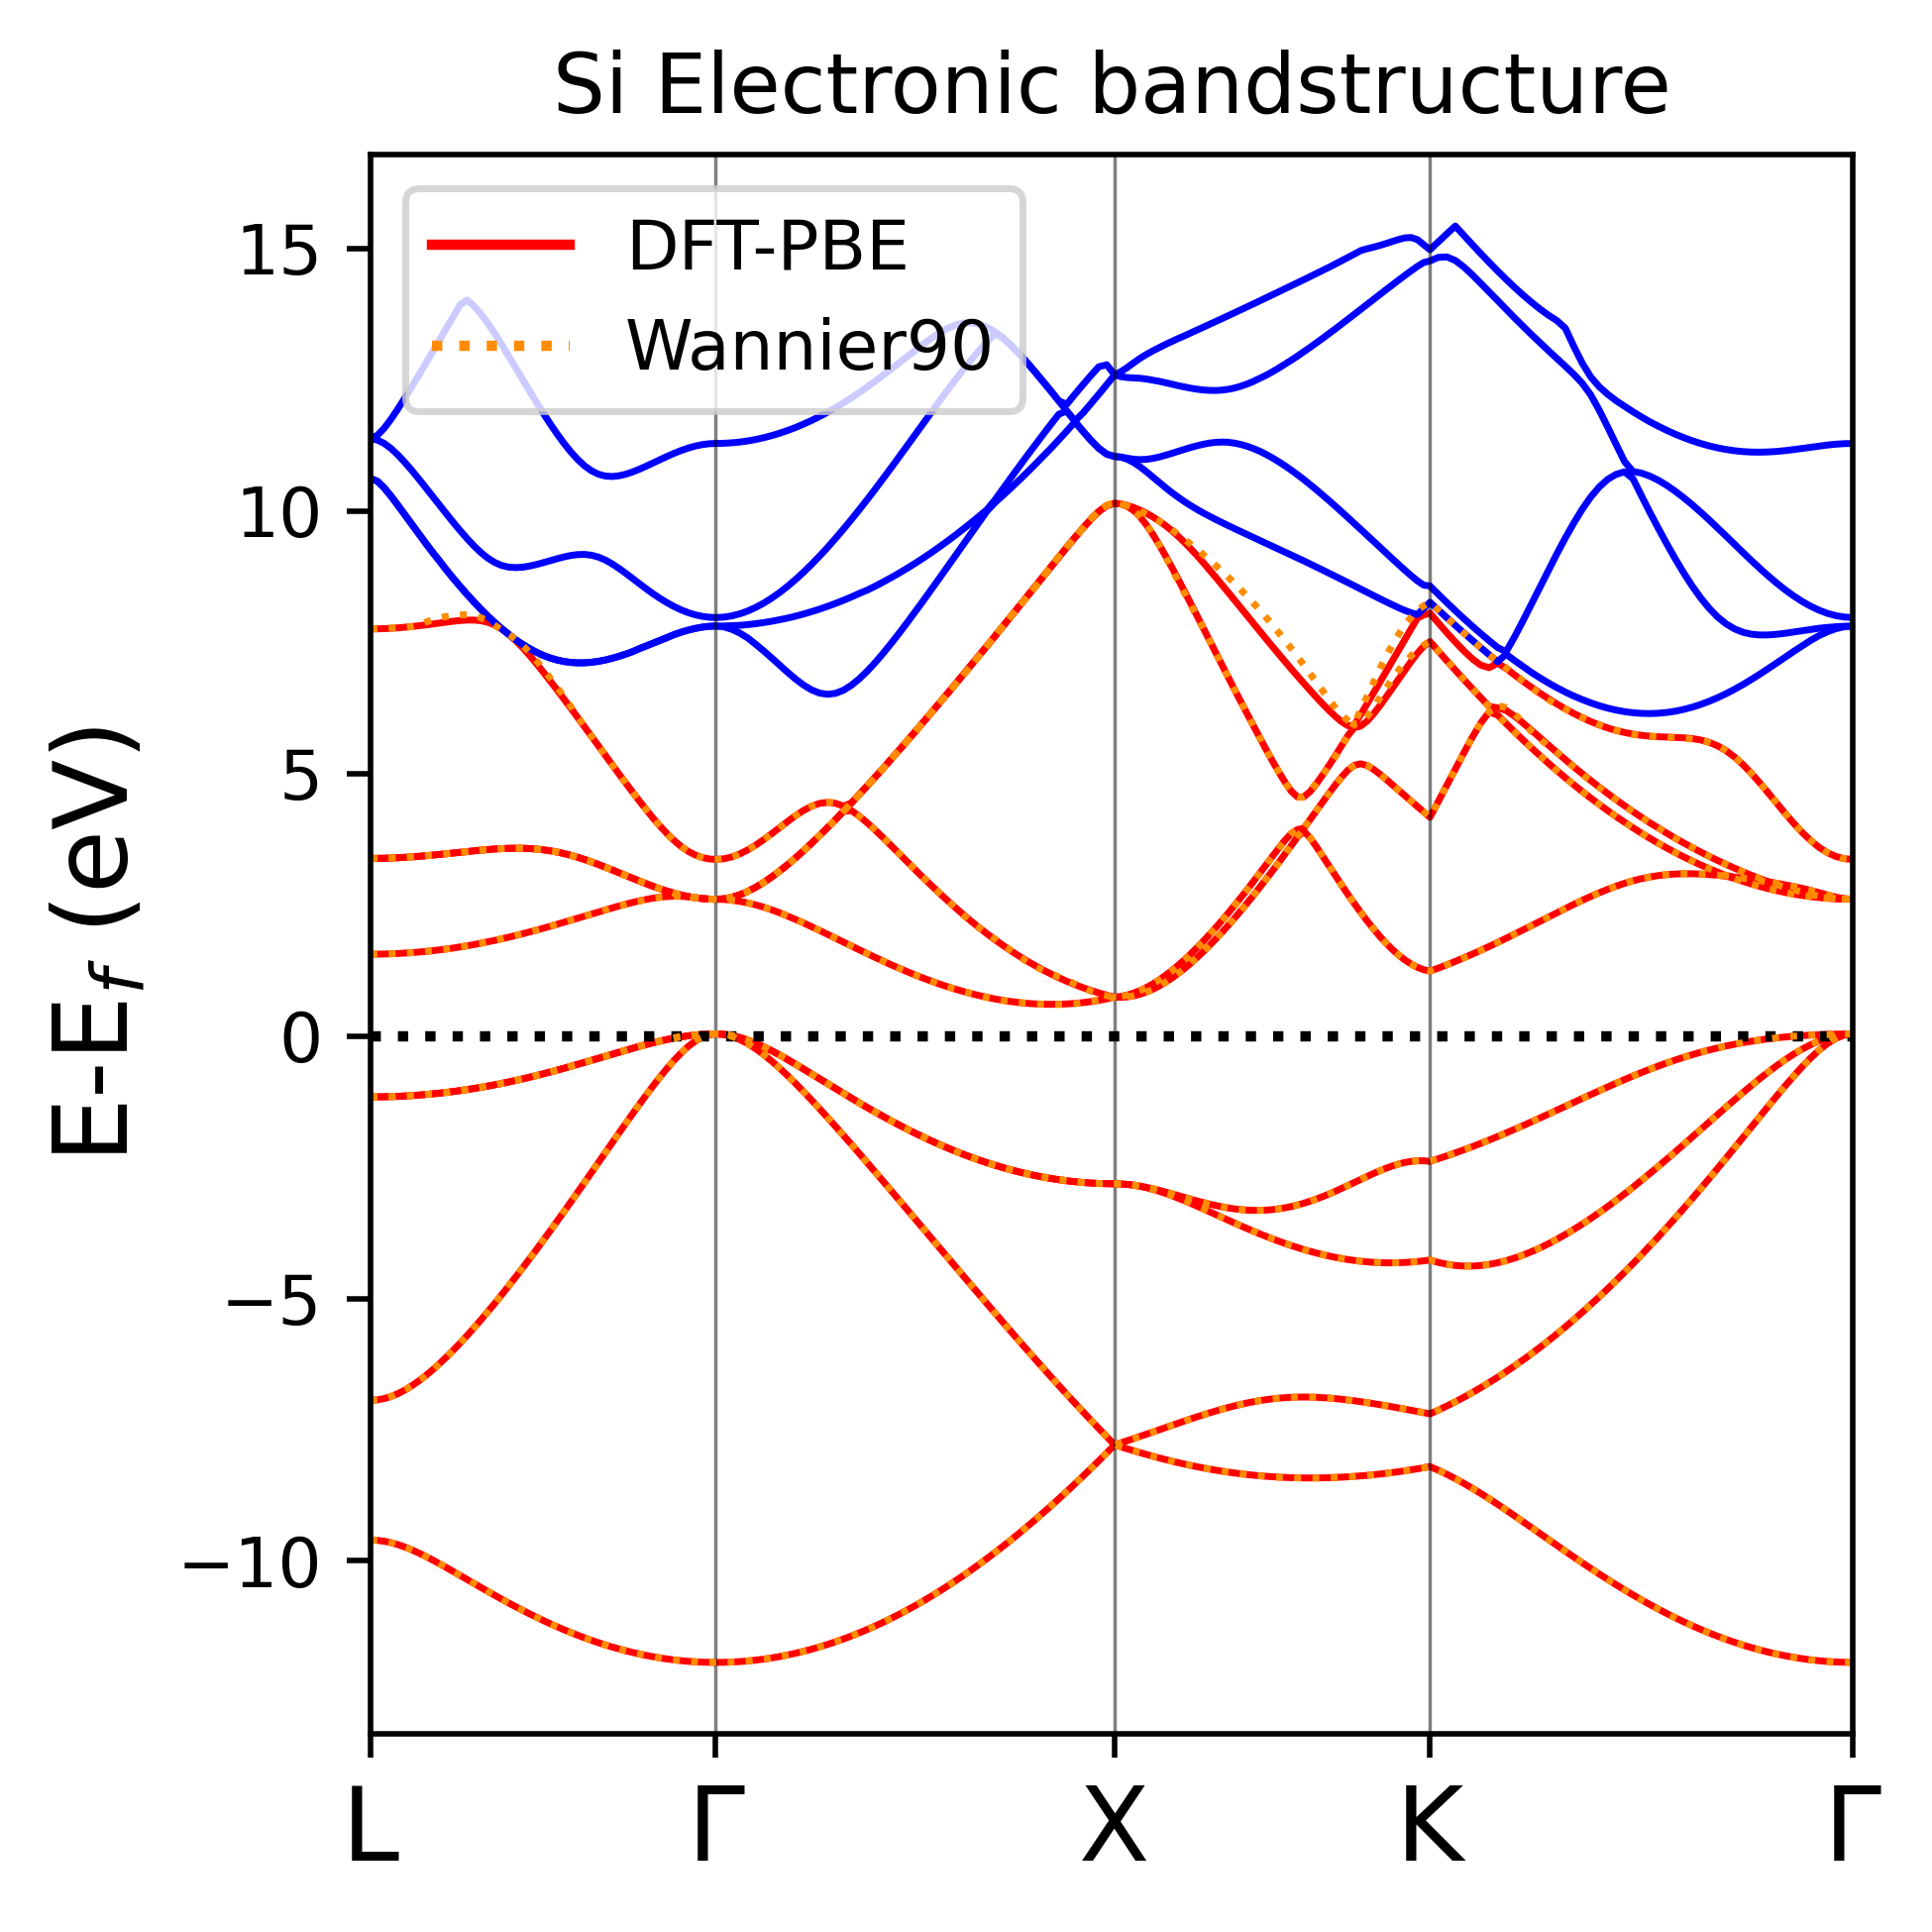

In [29]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 30 13:10:08 2024

@author: tommy
"""
#Electronic band
import numpy as np
import matplotlib.pyplot as plt

plt.figure(dpi=500,figsize=(4,4))
data = np.loadtxt("Si_bands.dat.gnu")
N = np.sum(data[:,0]==0)
tmp = np.array_split(data, N)

Ef = 6.1994    #From scf.out

print('# of bands:  ', N)
for i in range(8):
  plt.plot(tmp[i][:, 0], tmp[i][:, 1]-Ef, linewidth=1, alpha=1.0, color='r')
  print('Indices of targeted bands:  ', i+1)
for i in range(8,N):
  plt.plot(tmp[i][:, 0], tmp[i][:, 1]-Ef, linewidth=1, alpha=1.0, color='b')
  #print('Indices of bands:  ', i+1)


#plt.ylim(-2.3,3.2)  
plt.xlim(data[0,0],data[-1,0])
plt.ylabel("E-E$_{f}$ (eV)",fontsize=15)
plt.title("Si Electronic bandstructure")
plt.axvline(x=data[0, 0], linewidth=0.5, color='k', alpha=0.5)
plt.axvline(x=data[50, 0], linewidth=0.5, color='k', alpha=0.5)
plt.axvline(x=data[100, 0], linewidth=0.5, color='k', alpha=0.5)
plt.axvline(x=data[150, 0], linewidth=0.5, color='k', alpha=0.5)
plt.axvline(x=data[200, 0], linewidth=0.5, color='k', alpha=0.5)
plt.xticks(ticks= [data[0, 0], data[50, 0], data[100, 0], data[150, 0], data[200, 0]], \
           labels=['L','$\Gamma$', 'X', 'K', '$\Gamma$'],fontsize=15)
plt.hlines(0,data[0,0],data[-1,0],linestyles='dotted',colors="k")

DIS_FROZ_MAX = 6.0
DIS_FROZ_MIN = -12.1
DIS_WIN_MAX = 10.5
DIS_WIN_MIN = -12.1
#plt.axhline(DIS_FROZ_MAX,linestyle='--',color='limegreen',label='Inner energy window')  
#plt.axhline(DIS_FROZ_MIN,linestyle='--',color='limegreen')    
#plt.axhline(DIS_WIN_MAX,linestyle='--',color='darkgreen',label='Outer energy window')   
#plt.axhline(DIS_WIN_MIN,linestyle='--',color='darkgreen') 
print('DIS_FROZ_MAX = ', DIS_FROZ_MAX+Ef)
print('DIS_FROZ_MIN = ', DIS_FROZ_MIN+Ef)
print('DIS_WIN_MAX = ', DIS_WIN_MAX+Ef)
print('DIS_WIN_MIN = ', DIS_WIN_MIN+Ef)

####Wannier band
data_wan = np.loadtxt("Si_band.dat")
N = np.sum(data_wan[:,0]==0)
tmp_wan = np.array_split(data_wan, N)
x_r = data[200, 0]/np.max(tmp_wan[0][:, 0])
for i in range(N):
  plt.plot(tmp_wan[i][:, 0]*x_r, tmp_wan[i][:, 1]-Ef, linewidth=1, alpha=1.0, color='darkorange', linestyle="dotted")
####

plt.plot(0,0, color='r', label='DFT-PBE')
plt.plot(0,0, color='darkorange', label='Wannier90', linestyle="dotted")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig('electronic_band.png')


### Job scripts

#### job_scf.sh

#### job_band.sh

#### job_pp.sh

#### job_nscf.sh

#### job_pw2wan.sh